# Topic Modeling for youth alcohol consumption - Bertopic

In [1]:
# parameters
nr_of_articles = 10000
startyear = 2000 
nr_topics = 11
min_topic_size = 25

# hyperparameter tuning of Bertopic: https://maartengr.github.io/BERTopic/getting_started/parameter%20tuning/parametertuning.html

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)


## Data

Searchstring 1 Web of Science: alcohol* AND (adolescen* OR youth OR minor OR underage*) AND (factors OR determinant* OR Cause* OR influence* OR Predictor*)
 
zoeken op Topic  (--> Searches title, abstract and author keywords.)

Dit geeft: n = 23.260 (artikels)

inclusie/exclusiecriteria
Refine: open acces (n=11.605)
Refine: english (n=11.260)
Refine: article + early acces (n = 10,436) --> alle andere bronnen geëxcludeerd op deze wijze

Sort by relevance. 

Searchstring 2 Web of Science: (alcohol*) AND (adolescen* OR youth OR minor OR underage*) AND (factor* OR determinant* OR Cause* OR influence* OR Predictor*)
 
zoeken op Title + Abstract

languages: english,
open acces, 
Document typers: article
Publication Year >= 2000





In [6]:
art1 = pd.read_excel('datasets/savedrecs-0001-1000.xls')
art2 = pd.read_excel('datasets/savedrecs-1001-2000.xls')
art3 = pd.read_excel('datasets/savedrecs-2001-3000.xls')
art4 = pd.read_excel('datasets/savedrecs-3001-4000.xls')
art5 = pd.read_excel('datasets/savedrecs-4001-5000.xls')
art6 = pd.read_excel('datasets/savedrecs-5001-5596.xls')    
articles = pd.concat([art1, art2, art3, art4, art5, art6], ignore_index=True, axis=0)

In [7]:
articles = articles[articles['Publication Year'] >= startyear]

In [8]:
len(articles)

5597

In [9]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Publication Type            5597 non-null   object 
 1   Authors                     5597 non-null   object 
 2   Book Authors                0 non-null      float64
 3   Book Editors                5 non-null      object 
 4   Book Group Authors          0 non-null      float64
 5   Author Full Names           5597 non-null   object 
 6   Book Author Full Names      0 non-null      float64
 7   Group Authors               104 non-null    object 
 8   Article Title               5597 non-null   object 
 9   Source Title                5597 non-null   object 
 10  Book Series Title           5 non-null      object 
 11  Book Series Subtitle        0 non-null      float64
 12  Language                    5597 non-null   object 
 13  Document Type               5597 

## Preprocessing

In [10]:
print(len(articles))
articles.drop_duplicates(subset=['Article Title', 'Abstract'], inplace=True)
print(len(articles))

5597
5596


In [11]:
art = articles
art.head(2)

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Shin, YJ; Lee, JK; Lu, Y; Hecht, ML",NaN,NaN,NaN,"Shin, YoungJu; Lee, Jeong-Kyu; Lu, Yu; Hecht, Michael L.",NaN,NaN,Exploring Parental Influence on the Progression of Alcohol Use in Mexican-Heritage Youth: a Latent Transition Analysis,PREVENTION SCIENCE,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Youth substance use; Latent class analysis; Latent transition analysis; Targeted parent-child communication; Parental monitoring,SUBSTANCE USE; DRUG-USE; CHILD COMMUNICATION; FAMILY-STRUCTURE; SAS PROCEDURE; LATINO YOUTH; SELF-ESTEEM; ADOLESCENTS; RISK; MARIJUANA,"Mexican-heritage youth are members of the fastest growing minority group and are at particular risk for substance use including alcohol consumption. Youth face numerous risk factors including positive descriptions of substance use on media and peer offers that are potentially ameliorated by parental anti-substance use socialization efforts. Guided by primary socialization theory and the theory of planned behavior, the present study posited eight research questions to identify discrete subgroups/patterns of Mexican-heritage youth alcohol use behavior and parental influence on youth outcomes. Longitudinal survey data (n = 1147) from youth in 29 public schools located in Phoenix, Arizona, were collected over 3 years. Latent class and transition analyses identified four discrete subgroups characterized by response patterns of alcohol use behaviors and perceptions in Mexican-heritage youth: (1) non-drinker, (2) potential drinker, (3) experimenter, and (4) regular drinker. Targeted parent-child communication about alcohol and parental monitoring were found to be significant predictors for youth alcohol use. Research implications and future directions are suggested.","[Shin, YoungJu] Indiana Univ Purdue Univ, Dept Commun Studies, 425 Univ Blvd,Cavanaugh Hall 309, Indianapolis, IN 46202 USA; [Lee, Jeong-Kyu] Univ Wollongong, Ctr Hlth Initiat, Wollongong, NSW, Australia; [Lu, Yu; Hecht, Michael L.] Penn State Univ, Dept Commun Arts & Sci, University Pk, PA 16802 USA",Indiana University System; Indiana University-Purdue University Indianapolis; University of Wollongong; Pennsylvania Commonwealth System of Higher Education (PCSHE); Pennsylvania State University; Pennsylvania State University - University Park,"Shin, YJ (corresponding author), Indiana Univ Purdue Univ, Dept Commun Studies, 425 Univ Blvd,Cavanaugh Hall 309, Indianapolis, IN 46202 USA.",younshin@iupui.edu; jklee@uow.edu.au; yxl235@psu.edu; mlh10@psu.edu,"Lu, Yu/AGB-5690-2022; Shin, YoungJu/ABA-1000-2020; Lu, Yu/AAA-3190-2020","Lu, Yu/0000-0002-5128-6868; Shin, YoungJu/0000-0001-6751-8064",National Institute on Drug Abuse [R01DA005629],National Institute on Drug Abuse(United States Department of Health & Human ServicesNational Institutes of Health (NIH) - USANIH National Institute on Drug Abuse (NIDA)),"This manuscript was supported by Grant Numbe

In [13]:
art['text'] = art['Article Title'].fillna('') + ' ' + art['Abstract'].fillna('')
art.head(2)


,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Affiliations,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Name Preferred,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,DOI Link,Book DOI,Early Access Date,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,text
0,J,"Shin, YJ; Lee, JK; Lu, Y; Hecht, ML",NaN,NaN,NaN,"Shin, YoungJu; Lee, Jeong-Kyu; Lu, Yu; Hecht, Michael L.",NaN,NaN,Exploring Parental Influence on the Progression of Alcohol Use in Mexican-Heritage Youth: a Latent Transition Analysis,PREVENTION SCIENCE,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Youth substance use; Latent class analysis; Latent transition analysis; Targeted parent-child communication; Parental monitoring,SUBSTANCE USE; DRUG-USE; CHILD COMMUNICATION; FAMILY-STRUCTURE; SAS PROCEDURE; LATINO YOUTH; SELF-ESTEEM; ADOLESCENTS; RISK; MARIJUANA,"Mexican-heritage youth are members of the fastest growing minority group and are at particular risk for substance use including alcohol consumption. Youth face numerous risk factors including positive descriptions of substance use on media and peer offers that are potentially ameliorated by parental anti-substance use socialization efforts. Guided by primary socialization theory and the theory of planned behavior, the present study posited eight research questions to identify discrete subgroups/patterns of Mexican-heritage youth alcohol use behavior and parental influence on youth outcomes. Longitudinal survey data (n = 1147) from youth in 29 public schools located in Phoenix, Arizona, were collected over 3 years. Latent class and transition analyses identified four discrete subgroups characterized by response patterns of alcohol use behaviors and perceptions in Mexican-heritage youth: (1) non-drinker, (2) potential drinker, (3) experimenter, and (4) regular drinker. Targeted parent-child communication about alcohol and parental monitoring were found to be significant predictors for youth alcohol use. Research implications and future directions are suggested.","[Shin, YoungJu] Indiana Univ Purdue Univ, Dept Commun Studies, 425 Univ Blvd,Cavanaugh Hall 309, Indianapolis, IN 46202 USA; [Lee, Jeong-Kyu] Univ Wollongong, Ctr Hlth Initiat, Wollongong, NSW, Australia; [Lu, Yu; Hecht, Michael L.] Penn State Univ, Dept Commun Arts & Sci, University Pk, PA 16802 USA",Indiana University System; Indiana University-Purdue University Indianapolis; University of Wollongong; Pennsylvania Commonwealth System of Higher Education (PCSHE); Pennsylvania State University; Pennsylvania State University - University Park,"Shin, YJ (corresponding author), Indiana Univ Purdue Univ, Dept Commun Studies, 425 Univ Blvd,Cavanaugh Hall 309, Indianapolis, IN 46202 USA.",younshin@iupui.edu; jklee@uow.edu.au; yxl235@psu.edu; mlh10@psu.edu,"Lu, Yu/AGB-5690-2022; Shin, YoungJu/ABA-1000-2020; Lu, Yu/AAA-3190-2020","Lu, Yu/0000-0002-5128-6868; Shin, YoungJu/0000-0001-6751-8064",National Institute on Drug Abuse [R01DA005629],National Institute on Drug Abuse(United States Department of Health & Human ServicesNational Institutes of Health (NIH) - USANIH National Institute on Drug Abuse (NIDA)),"This manuscript was supported by Grant 

In [14]:
# Lemmatization
import nltk
import string
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('all')   # download wordlist
from nltk.stem import WordNetLemmatizer
english_stopwords = set(nltk.corpus.stopwords.words('english'))
punctuation = set(string.punctuation)

art['text'] = art['text'].str.replace(r'\b\w{1,3}\b', '') # remove words with less than 3 characters
art['text'] = art['text'].str.replace(r'\d+', '') # remove numbers


lemmatizer = WordNetLemmatizer() 
# tgw = ['alcohol','substance','youth','adolescent','factor','factors','among']  # topic general words to be excluded
tgw = ['alcohol','among']  # topic general words to be excluded

def lemmatizing_en(text):
    word_tokens = word_tokenize(text.lower()) 
    word_tokens = [word for word in word_tokens if word not in punctuation]
    word_tokens = [word for word in word_tokens if word.isalpha()]
    word_tokens = [word for word in word_tokens if word not in english_stopwords]
    word_tokens = [word for word in word_tokens if word not in tgw]
    result = [lemmatizer.lemmatize(x) for x in word_tokens]
    seperator = ' '
    return seperator.join(result)  # return list and string

art['text'] = [lemmatizing_en(s) for s in art['text']]

for word in tgw:
    art['text'] = art['text'].str.replace(word, '') # remove tgw words

art['text'] = art['text'].str.replace(r'\b\w{1,3}\b', '') # remove lemmas with less than 3 characters


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[

In [15]:
art['text'].iloc[0]

'exploring parental influence progression use youth latent transition analysis youth member fastest growing minority group particular risk substance use including consumption youth face numerous risk factor including positive description substance use medium peer offer potentially ameliorated parental use socialization effort guided primary socialization theory theory planned behavior present study posited eight research question identify discrete youth use behavior parental influence youth outcome longitudinal survey data n youth public school located phoenix arizona collected year latent class transition analysis identified four discrete subgroup characterized response pattern use behavior perception youth potential drinker experimenter regular drinker targeted communication parental monitoring found significant predictor youth use research implication future direction suggested'

## Bertopic

In [16]:
art.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5596 entries, 0 to 5596
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Publication Type            5596 non-null   object 
 1   Authors                     5596 non-null   object 
 2   Book Authors                0 non-null      float64
 3   Book Editors                5 non-null      object 
 4   Book Group Authors          0 non-null      float64
 5   Author Full Names           5596 non-null   object 
 6   Book Author Full Names      0 non-null      float64
 7   Group Authors               104 non-null    object 
 8   Article Title               5596 non-null   object 
 9   Source Title                5596 non-null   object 
 10  Book Series Title           5 non-null      object 
 11  Book Series Subtitle        0 non-null      float64
 12  Language                    5596 non-null   object 
 13  Document Type               5596 non-n

In [17]:
docs = art['text']

In [25]:

from bertopic import BERTopic

# Pre-calculate embeddings
# from sentence_transformers import SentenceTransformer
# embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
# embeddings = embedding_model.encode(docs, show_progress_bar=True)


# dimensionality reduction
# from umap import UMAP
import umap.umap_ as UMAP
umap_model = UMAP.UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)    # Prevent Stochastic Behavior with random_state

# clustering (controlling number of topics)
# from hdbscan import HDBSCAN
# hdbscan_model = HDBSCAN(min_cluster_size=150, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Improve topic representations
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 2))

# Fine-tune your topic representations
from bertopic.representation import KeyBERTInspired
representation_model = KeyBERTInspired()

topic_model = BERTopic(

  # Pipeline models
  # embedding_model=embedding_model,
  umap_model=umap_model,
  # hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,

  # Hyperparameters
  nr_topics=nr_topics,
  top_n_words=10,
  verbose=True
)

topics, probs = topic_model.fit_transform(docs)



2025-05-05 08:46:58,842 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 175/175 [01:41<00:00,  1.73it/s]
2025-05-05 08:48:42,228 - BERTopic - Embedding - Completed ✓
2025-05-05 08:48:42,229 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-05 08:49:07,498 - BERTopic - Dimensionality - Completed ✓
2025-05-05 08:49:07,499 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-05 08:49:07,639 - BERTopic - Cluster - Completed ✓
2025-05-05 08:49:07,640 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-05-05 08:49:09,837 - BERTopic - Representation - Completed ✓
2025-05-05 08:49:09,845 - BERTopic - Topic reduction - Reducing number of topics
2025-05-05 08:49:09,854 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-05 08:49:14,260 - BERTopic - Representation - Completed ✓
2025-05-05 08:49:14,268 - BERTopic - Topic reduction - Re

In [26]:
topic_model.save(path=".", serialization="safetensors", save_ctfidf=True)

In [27]:
nr_topics

11

In [28]:
probs[:20]

array([0.        , 0.        , 0.86817102, 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.93935844, 0.92708201,
       0.83470609, 0.787115  , 0.22766357, 0.        , 0.        ,
       1.        , 0.56335879, 0.66178954, 0.        , 0.        ])

In [29]:
opt_nr_topics = len(set(topics))
opt_nr_topics

11

In [30]:
topic_model.visualize_barchart(top_n_topics=10, n_words=10,width=350, height=350)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.286390095949173, 0.2887447774410248, 0.29867544770240784,
                    0.30821043252944946, 0.3167862892150879, 0.34015098214149475,
                    0.34390944242477417, 0.4113450348377228, 0.4115491509437561,
                    0.4353157877922058],
              'xaxis': 'x',
              'y': [tobacco  , smoking  , cannabis  , adulthood  , youth  ,
                    prevalence  , marijuana  , adolescence  , adolescent  ,
                    substance use  ],
              'yaxis': 'y'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.2445606142282486, 0.25057363510131836, 0.30690252780914307,
                    0.3158787488937378, 0.32487764954566956, 0.3455274701118469,
                    0.369458943605423, 0.4479731321334839, 0.5101876854896545,
                    0.6007471084594727],
              'xaxis': 'x2',
              'y': [amygdala  , prenatal exposure  , adolescent adult  , adulthood
                    , drinking  , adolescent  , adolescence  , binge drinking  ,
                    ethanol  , ethanol exposure  ],
              'yaxis': 'y2'},
             {'marker': {'color': '#CC79A7'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.4185301959514618, 0.4198264479637146, 0.42829906940460205,
                    0.43960219621658325, 0.4460241198539734, 0.4498913288116455,
                    0.4623319208621979, 0.4673660397529602, 0.4817284345626831,
                    0.5141507387161255],
              'xaxis': 'x3',
              'y': [sexual initiation  , condom  , hiv infection  , sexual
                    intercourse  , sexual behaviour  , hiv  , sexual behavior  ,
                    condom use  , sexually transmitted  , sexual risk  ],
              'yaxis': 'y3'},
             {'marker': {'color': '#E69F00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.26390841603279114, 0.27563169598579407, 0.2794501483440399,
                    0.29143765568733215, 0.3013691008090973, 0.30307430028915405,
                    0.3303466737270355, 0.3496735095977783, 0.3745286464691162,
                    0.4457639753818512],
              'xaxis': 'x4',
              'y': [obese  , fatty  , prevalence  , obesity  , triglyceride  ,
                    cholesterol  , hepatic steatosis  , metabolic syndrome  , liver
                    disease  , fatty liver  ],
              'yaxis': 'y4'},
             {'marker': {'color': '#56B4E9'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.24276264011859894, 0.25033876299858093, 0.26562735438346863,
                    0.2688705325126648, 0.2726392447948456, 0.28162527084350586,
                    0.3005619943141937, 0.3030247390270233, 0.3471430838108063,
                    0.3651362359523773],
              'xaxis': 'x5',
              'y': [risk factor  , mortality  , fracture  , intoxication  ,
                    adolescent  , accident  , severity  , injury  , acute
                    intoxication  , trauma  ],
              'yaxis': 'y5'},
             {'marker': {'color': '#009E73'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.26821351051330566, 0.26954784989356995, 0.27841854095458984,
                    0.2948668599128723, 0.3517884612083435, 0.35270702838897705,
                    0.3565855324268341, 0.38233256340026855, 0.3947370946407318,
                    0.47226497530937195],
              'xaxis': 'x6',
              'y': [fatty acid  , ethyl  , spectrometry  , acetate  , yeast  ,
                    grape  , wine  , ethanol  , phenolic  , fermentation  ],
              'yaxis': 'y6'},
             {'marker': {'color': '#F0E442'},
              'orientation': 'h',

In [31]:
topic_model.visualize_topics()

ModuleNotFoundError: UMAP is required to reduce the embeddings.. Please install it using `pip install umap-learn`.

In [ ]:
tm = topic_model.get_topic_info()[['Topic', 'Count', 'Name','Representation']]
tm

NameError: name 'topic_model' is not defined

In [ ]:
tm.to_excel('../topics.xlsx', index=False)

In [23]:
# Run the visualization with the original embeddings
# topic_model.visualize_documents(art['text'], embeddings=embeddings)

In [ ]:
topic_model.visualize_heatmap()

## Attaching Discovered Topic Labels to Original Articles

In [ ]:
art['Topic'] = topics
art['Prob'] = probs
# art = art[(art['Topic'] >= 0)]   # -1 refers to all outliers and should typically be ignored. 
art = art.drop(columns=['text'])

In [ ]:
art[art['Topic'] == 1][['Article Title','Abstract','Prob']][:10]

,Article Title,Abstract,Prob
130,Emotional Processing and Brain Activity in Youth at High Risk for Alcoholism,"Background: Even in the absence of heavy alcohol use, youth with familial alcoholism (family history positive [FHP]) exhibit atypical brain functioning and behavior. Although emotional and cognitive systems are affected in alcohol use disorders (AUDs), little attention has focused on whether brain and behavior phenotypes related to the interplay between affective and executive functioning may be a premorbid risk factor for the development of AUDs in FHP youth. Methods: Twenty-four FHP and 22 family history negative (FHN) 12- to 16-year-old adolescents completed study procedures. After exclusion of participants with clinically significant depressive symptoms and those who did not meet performance criteria during an Emotional Go-NoGo task, 19 FHP and 17 FHN youth were included in functional magnetic resonance imaging (fMRI) analyses. Resting state functional connectivity MRI, using amygdalar seed regions, was analyzed in 16 FHP and 18 FHN youth, after exclusion of participants with excessive head movement. Results: fMRI showed that brain activity in FHP youth, compared with FHN peers, was reduced during emotional processing in the superior temporal cortex, as well as during cognitive control within emotional contexts in frontal and striatal regions. Group differences in resting state amygdalar connectivity were seen bilaterally between FHP and FHN youth. In FHP youth, reduced resting state synchrony between the left amygdala and left superior frontal gyrus was related to poorer response inhibition, as measured during the fMRI task. Conclusions: To our knowledge, this is the first study to examine emotion-cognition interactions and resting state functional connectivity in FHP youth. Findings from this research provide insight into neural and behavioral phenotypes associated with emotional processing in familial alcoholism, which may relate to increased risk of developing AUDs.",0.584518
141,"Prenatal substance exposure, adverse childhood experiences and diagnosed mental and behavioral disorders - A longitudinal register-based matched cohort study in Finland","Both prenatal substance exposure (PSE, alcohol/drugs) and experiences during the first years of life have powerful effects on brain development. However, only a few studies have investigated the combined effect of PSE and adverse childhood experiences (ACEs) on mental and behavioral disorders among exposed adolescents and adults. This longitudinal register-based cohort study 1) compared the nature and extent of diagnosed mental and behavioral disorders among youth with PSE and matched unexposed controls, and 2) investigated the influence of PSE, health in infancy and ACEs (maternal risk factors and out-of-home care, OHC) on diagnoses of mental and behavioral disorders. The data consisted of 615 exposed youth aged 15-24 years and 1787 matched unexposed controls. Data from hospital medical records and nine registers were merged for the analysis. Descriptive analysis methods and Cox regression were used. The results showed that the prevalence of mental and behavioral disorders was twice as high among exposed compared with controls. The highest levels of mental and behavioral disorders and ACEs were found among exposed with at least one OHC episode. The difference in the risk of mental and behavioral disorders between exposed and controls diminished after controlling for the effect of ACEs. Low birth weight, maternal risk factors, and OHC were the strongest predictors of mental and behavioral disorders. The results suggest that PSE alone does not explain poorer mental health among exposed youth. Risk factors accumulate, and low birth weight and ACEs are strongly associated with increased risk of mental and behavioral disorders.",0.688872
147,The Relationship Between Socioeconomic Status and Brain Volume in Children and Adolescents With Prenatal Alcohol Exposure,"The pos

## Number of articles per topic and per year

In [ ]:
# pivot table year x topic --> count

pvt = pd.pivot_table(art, columns="Topic", index="Publication Year", values='Abstract',aggfunc='count', margins=True).fillna(0).astype(int)
pvt

Topic,-1,0,1,2,3,4,5,6,7,8,9,All
Publication Year,,,,,,,,,,,,
2000,11,10,1,2,0,0,0,0,0,0,0,24
2001,14,10,3,0,2,0,1,1,0,0,0,31
2002,12,16,0,2,3,0,1,2,0,0,0,36
2003,9,16,0,0,1,0,1,0,1,0,0,28
2004,8,13,1,0,0,0,0,2,0,0,0,24
2005,13,17,1,2,1,0,0,1,0,1,0,36
2006,25,35,2,1,1,0,2,0,1,0,0,67
2007,28,55,4,0,1,1,3,0,0,1,0,93
2008,47,82,4,1,1,2,4,0,1,1,0,143


In [ ]:
pvt.to_excel('../pvt.xlsx')

### Time trends

In [ ]:
pvt1 = pvt.reset_index()
pvt2 = pvt1.copy()

pvt1 = pvt1.drop('All',axis=1)
# pvt1 = pvt1[(pvt1['Publication Year'] != 2024)]
pvt1 = pvt1[:-1]
pvt1

Topic,Publication Year,-1,0,1,2,3,4,5,6,7,8,9
0,2000,11,10,1,2,0,0,0,0,0,0,0
1,2001,14,10,3,0,2,0,1,1,0,0,0
2,2002,12,16,0,2,3,0,1,2,0,0,0
3,2003,9,16,0,0,1,0,1,0,1,0,0
4,2004,8,13,1,0,0,0,0,2,0,0,0
5,2005,13,17,1,2,1,0,0,1,0,1,0
6,2006,25,35,2,1,1,0,2,0,1,0,0
7,2007,28,55,4,0,1,1,3,0,0,1,0
8,2008,47,82,4,1,1,2,4,0,1,1,0
9,2009,41,92,2,2,2,0,2,1,0,1,0


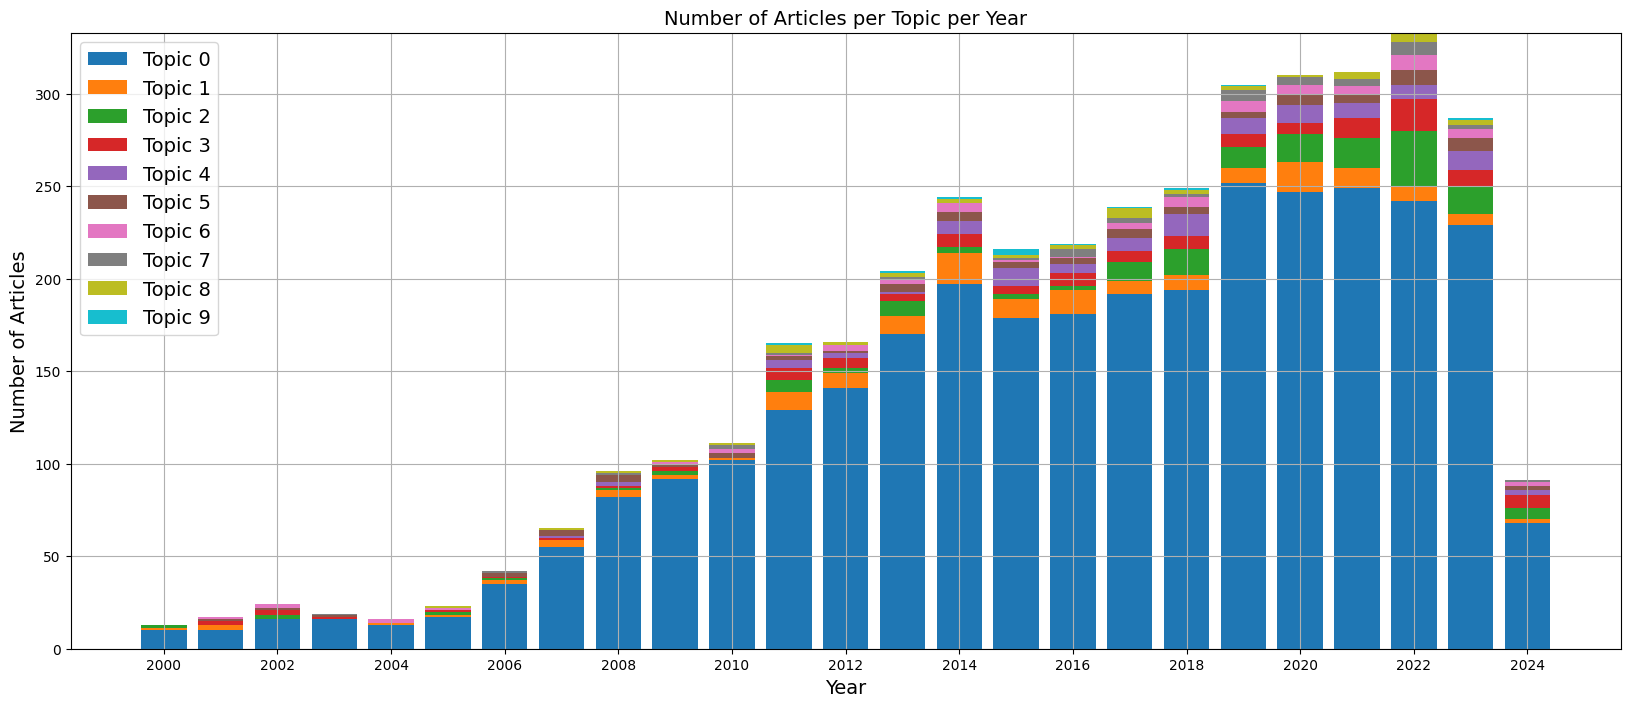

In [ ]:
from matplotlib import pyplot as plt
# set figure size as 8 x 20 inches
plt.figure(figsize=(20,8))
bottom = np.zeros(pvt1.shape[0])
for i in range(0, opt_nr_topics-1):
    plt.bar(pvt1['Publication Year'], pvt1[i], bottom = bottom, label=f'Topic {i}')
    bottom += pvt1[i]

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Topic per Year')
# set ticks on x as years
plt.xticks(np.arange(pvt1['Publication Year'].min(), pvt1['Publication Year'].max()+1, 2))
plt.legend()
plt.grid()
plt.show()

In [ ]:
pvt2['All'] = pvt2['All'] - pvt2[-1]

for i in range(0, opt_nr_topics-1):
    pvt2[i] = pvt2[i] / pvt2['All']

pvt2 = pvt2.drop('All',axis=1)
# pvt2 = pvt2[(pvt2['Publication Year'] != 2024)]
pvt2 = pvt2[:-1]
pvt2



Topic,Publication Year,-1,0,1,2,3,4,5,6,7,8,9
0,2000,11,0.769231,0.076923,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2001,14,0.588235,0.176471,0.000000,0.117647,0.000000,0.058824,0.058824,0.000000,0.000000,0.000000
2,2002,12,0.666667,0.000000,0.083333,0.125000,0.000000,0.041667,0.083333,0.000000,0.000000,0.000000
3,2003,9,0.842105,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000
4,2004,8,0.812500,0.062500,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000
5,2005,13,0.739130,0.043478,0.086957,0.043478,0.000000,0.000000,0.043478,0.000000,0.043478,0.000000
6,2006,25,0.833333,0.047619,0.023810,0.023810,0.000000,0.047619,0.000000,0.023810,0.000000,0.000000
7,2007,28,0.846154,0.061538,0.000000,0.015385,0.015385,0.046154,0.000000,0.000000,0.015385,0.000000
8,2008,47,0.854167,0.041667,0.010417,0.010417,0.020833,0.041667,0.000000,0.010417,0.010417,0.000000
9,2009,41,0.901961,0.019608,0.019608,0.019608,0.000000,0.019608,0.009804,0.000000,0.009804,0.000000


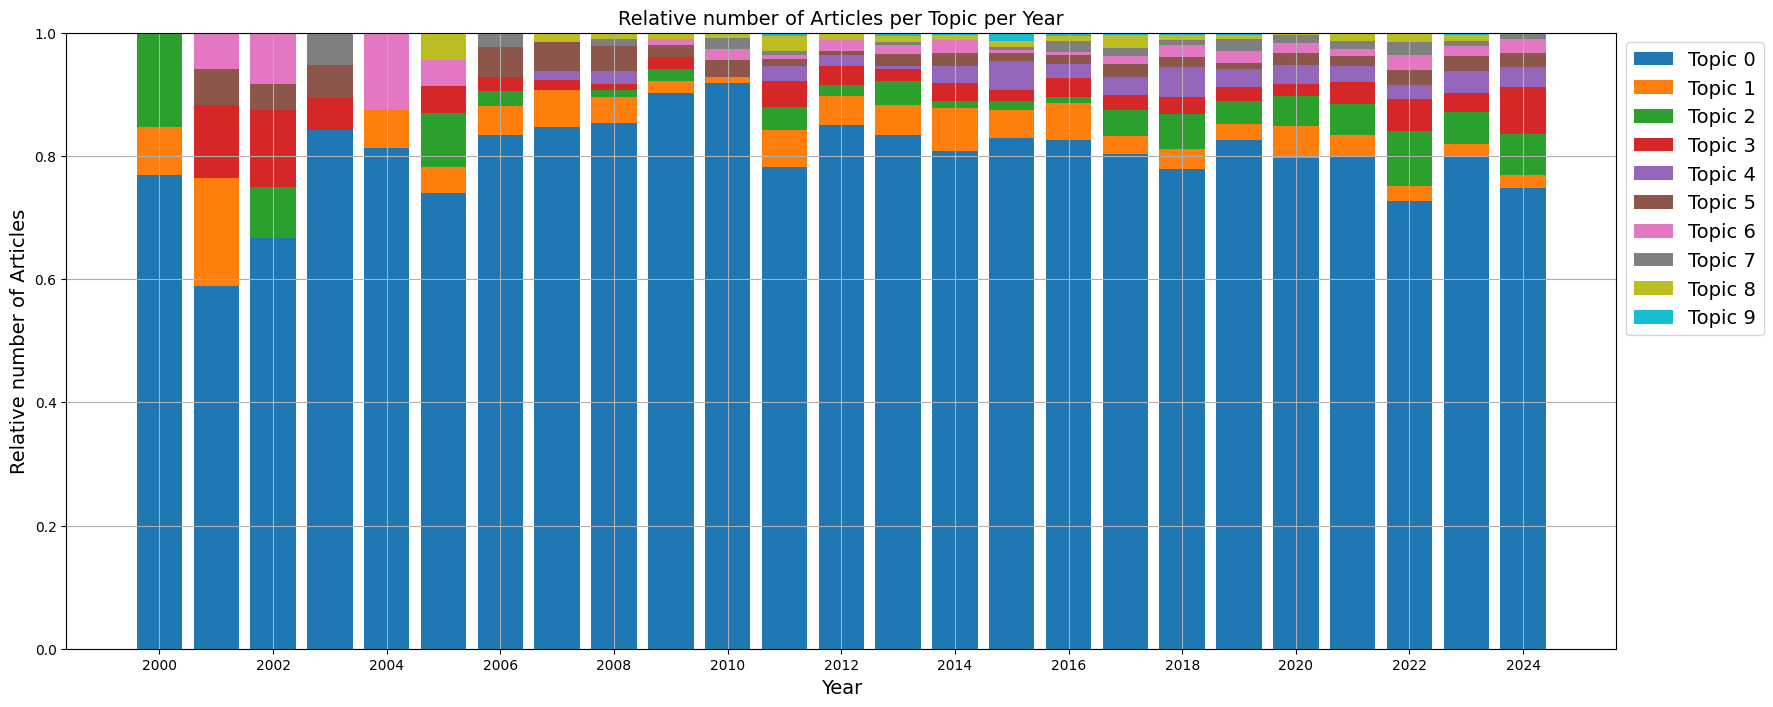

In [ ]:
from matplotlib import pyplot as plt
# set figure size as 8 x 20 inches
plt.figure(figsize=(20,8))

bottom = np.zeros(pvt1.shape[0])
for i in range(0, opt_nr_topics-1):
    plt.bar(pvt2['Publication Year'], pvt2[i], bottom=bottom, label=f'Topic {i}')
    bottom += pvt2[i]

plt.xlabel('Year')
plt.ylabel('Relative number of Articles')
plt.title('Relative number of Articles per Topic per Year')
# set ticks on x as years
plt.xticks(np.arange(pvt2['Publication Year'].min(), pvt2['Publication Year'].max()+1, 2))
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.grid()
plt.show()

In [ ]:
art.to_excel('.' + '.xlsx',index=False)

ValueError: No engine for filetype: ''

#### References

- LDA gensim vs scikit-learn: https://blog.devgenius.io/working-with-sklearn-latent-dirichlet-allocation-lda-topic-modeling-on-airline-sentiment-twitter-56dfacfd58bf  - 
- Perplexity score: https://medium.com/@iqra.bismi/topic-modelling-using-lda-fe81a2a806e0#:~:text=Perplexity%20is%20a%20commonly%20used,score%20indicates%20better%20model%20performance
- A Topic Modeling Comparison Between LDA, NMF, Top2Vec, and BERTopic to Demystify Twitter Posts: https://www.frontiersin.org/articles/10.3389/fsoc.2022.886498/full
- https://towardsdatascience.com/visualizing-topic-models-with-scatterpies-and-t-sne-f21f228f7b02
- https://maartengr.github.io/BERTopic/index.html 